<a href="https://colab.research.google.com/github/komorimasashi/Hokudai2023Resources/blob/main/MNIST_PCA_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 画像の主成分分析

画像の画素値に対する主成分分析は，かつては顔認識の分野で広く用いられていた．  
主成分ごとの固有ベクトルを画像化したものは，各主成分に対応する顔特徴を表しており，  
固有顔（eigen face）と呼ばれる．  ここでは手書き数字画像（MNIST）の主成分分析を行う．

<ipython-input-10-10962d2afe34>:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # グリッド内のスペースを最小限にする


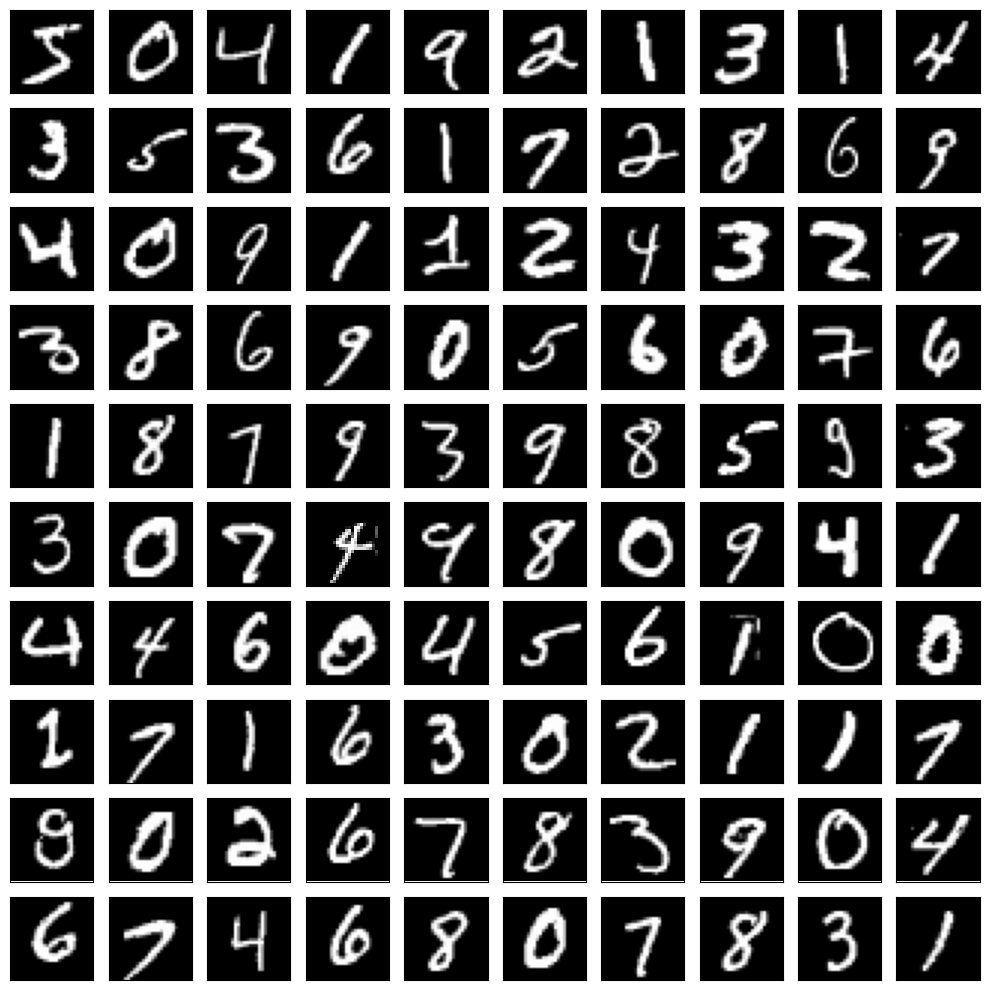

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA

# MNISTデータセットの読み込み
(train_images, train_labels),  (_, _) = mnist.load_data()


# データセットを表示する
plt.figure(figsize=(10, 10))  # 10x10の図を設定

for i in range(100):  # 100 images
    ax = plt.subplot(10, 10, i + 1)  # 10行 x 10列のsubplotの中でi+1番目の位置に配置
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.tight_layout()  # グリッド内のスペースを最小限にする

plt.show()

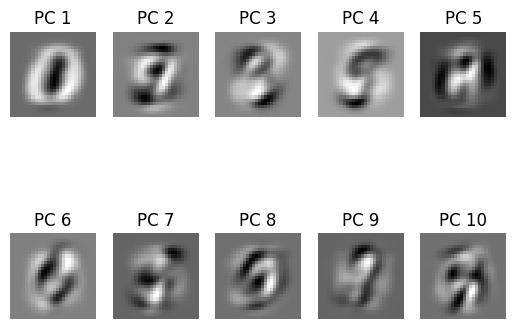

In [ ]:
# 主成分分析を行う
# 画像データを1Dベクトルに変換
train_vectors = train_images.reshape(train_images.shape[0], -1)

# 画像から平均を引き、中心化する
mean_image = np.mean(train_vectors, axis=0)
centered_data = train_vectors - mean_image

# 主成分分析（PCA）を使用してデータの主成分を計算
pca = PCA(n_components=10)  # ここでは最初の10の主成分を取得する
pca.fit(centered_data)
principal_components = pca.components_

# 主成分を表示
for i, component in enumerate(principal_components):
    plt.subplot(2, 5, i + 1)
    plt.imshow(component.reshape(28, 28), cmap="gray")
    plt.title(f"PC {i+1}")
    plt.axis("off")
plt.show()


### オートエンコーダによる画像特徴の記述

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
118/118 [==============================] - 13s 78ms/step - loss: 0.3253
Epoch 2/50
118/118 [==============================] - 5s 40ms/step - loss: 0.2437
Epoch 3/50
118/118 [==============================] - 3s 27ms/step - loss: 0.2296
Epoch 4/50
118/118 [==============================] - 4s 37ms/step - loss: 0.2192
Epoch 5/50
118/118 [==============================] - 4s 35ms/step - loss: 0.2100
Epoch 6/50
118/118 [==============================] - 3s 27ms/step - loss: 0.2047
Epoch 7/50
118/118 [==============================] - 3s 27ms/step - loss: 0.2014
Epoch 8/50
118/118 [==============================] - 4s 35ms/step - loss: 0.1989
Epoch 9/50
118/118 [==============================] - 4s 36ms/step - loss: 0.1969
Epoch 10/50
118/118 [==============================] - 3s 27ms/step - loss: 0.1950
Epoch 11/50
118/118 [==============================] - 3s 27ms/step - loss: 0.1933
Epoch 12/50
118/118 [=========

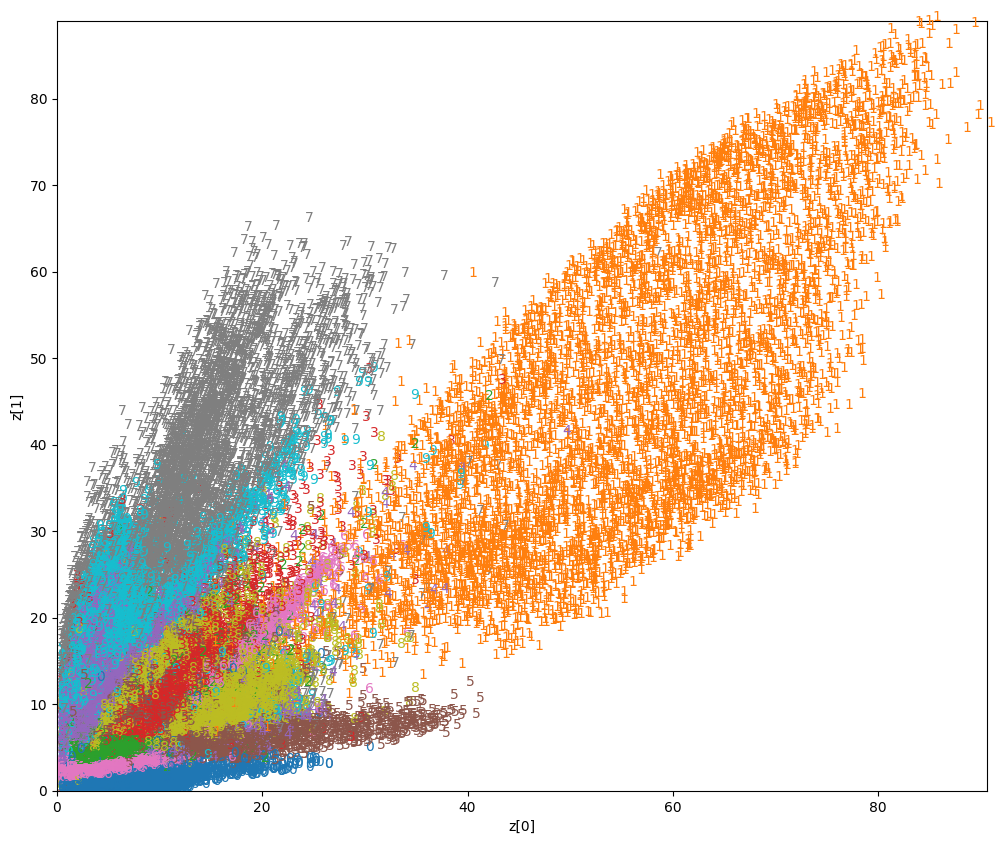

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# データセットの準備
mnist = tf.keras.datasets.mnist
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

# オートエンコーダの定義
# エンコーダ部分
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

# デコーダ部分
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# AEモデルの結合
autoencoder = Model(input_img, decoded)

# エンコーダモデルの定義（潜在変数の可視化のため）
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 学習
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True)

# 2次元の潜在変数を使用して散布図の作成
encoded_imgs = encoder.predict(x_train)
plt.figure(figsize=(12, 10))
# 各点をプロット
for i, (x, y) in enumerate(encoded_imgs):
    plt.text(x, y, str(y_train[i]), color=plt.cm.tab10(y_train[i] / 10.))
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.xlim(encoded_imgs[:,0].min(), encoded_imgs[:,0].max())
plt.ylim(encoded_imgs[:,1].min(), encoded_imgs[:,1].max())
plt.show()


1875/1875 [==============================] - 5s 3ms/step


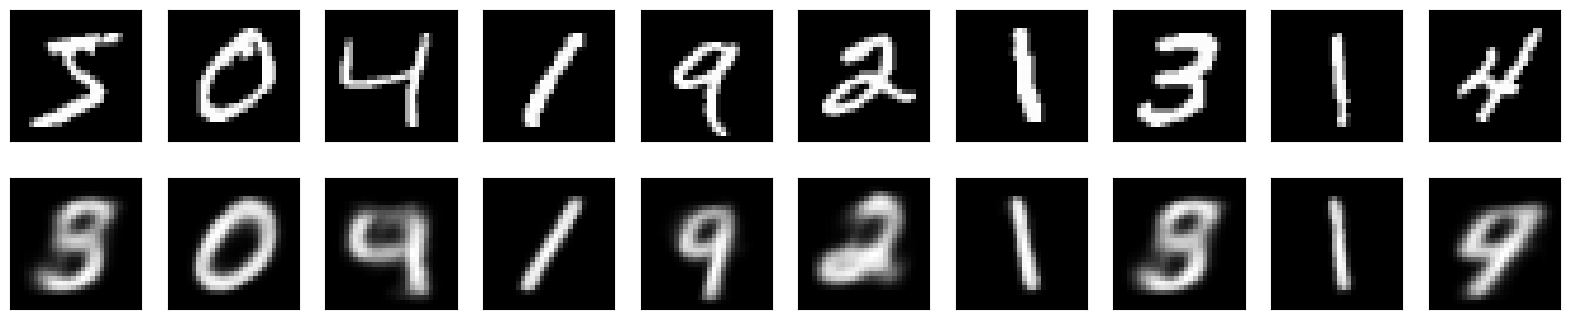

In [ ]:
# オリジナルの画像とデコードされた画像を表示
decoded_imgs = autoencoder.predict(x_train)
plt.figure(figsize=(20, 4))
for i in range(10):  # 10 images
    # Original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Decoded
    ax = plt.subplot(2, 10, i + 1 + 10)  # Shifted for decoded images
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()